# MCDSS - MESIIA virtual group.    URV
# **TASK 2. Aggregation operators for numerical data**

The goal of this session is to practise with two simple methods of aggregation: WSM (Weighted Sum Model) that is equivalent to weighted average and afterwards the OWA operator (Ordered Weighted Average).
The exercise will also enable you to the use of Python notebooks and with *mcda library* using Python programming tools.

This exercise is part of the evaluation of the course.

**You must write a report on this exercise and upload it at Moodle before the indicated deadline. You must submit a PDF file that includes the results of each task indicated below. In addition to the results, you must add clear and detailed explanations about the results, including the observations and conclusions at each question.**

The decision problem we will consider is the selection of the best restaurant for a certain decision maker. We will consider different restaurants in Tarragona and 6 criteria.

The first thing we should do is installing the MCDA package. To do that, we use the `pip` command. Run the cell and test if everything went correctly. Take a look to the MCDA package documentation to know how to use it properly. [Documentation](https://py-mcda.readthedocs.io/en/stable/index.html) and [Examples](https://py-mcda.readthedocs.io/en/stable/examples.html)

We will use version `0.4.0`.

In [2]:
!pip install mcda==0.4.0


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


## Task 1: **Weighted Average or Weighted Sum**

1. The input data of this MCDA methods is: a list of alternatives, a list of criteria and the weights of the criteria. In this model, weights represent the relative importance of each criterion. The sum of the weights must be 1 unit.

In [3]:
import mcda
import pandas as pd
from mcda.core.performance_table import *
from mcda.core.scales import *
from mcda.plot import *

alternatives = ["Terrat", "RacoAbat", "Dominos", "Ancora", "Frida", "Barhaus"]

criteria = {
    "Food": 0.3,
    "Personnel": 0.3,
    "Atmosphere": 0.1,
    "Category": 0.1,
    "Location": 0.1,
    "Terrace": 0.1
}
criteria

{'Food': 0.3,
 'Personnel': 0.3,
 'Atmosphere': 0.1,
 'Category': 0.1,
 'Location': 0.1,
 'Terrace': 0.1}

2. Here you have the performance table. Each row corresponds to one of the restaurants (alternatives) and each column contains the utility scores for the set of criteria. The range of the utility is 0..1 and all criteria are maximized.

In [4]:
performance_table = PerformanceTable(
    [[0.7, 0.9, 0.6, 0.9, 0.0, 0.4],
     [0.5, 0.7, 0.6, 0.7, 0.2, 0.0],
     [0.2, 0.3, 0.1, 0.2, 0.8, 0.0],
     [0.9, 0.5, 0.4, 0.3, 1.0, 0.7],
     [0.8, 0.7, 0.1, 0.5, 0.1, 0.4],
     [0.9, 1.0, 0.3, 0.8, 0.2, 1.0]],
    alternatives = alternatives,
    criteria = criteria.keys())

performance_table.df

,Food,Personnel,Atmosphere,Category,Location,Terrace
Terrat,0.7,0.9,0.6,0.9,0.0,0.4
RacoAbat,0.5,0.7,0.6,0.7,0.2,0.0
Dominos,0.2,0.3,0.1,0.2,0.8,0.0
Ancora,0.9,0.5,0.4,0.3,1.0,0.7
Frida,0.8,0.7,0.1,0.5,0.1,0.4
Barhaus,0.9,1.0,0.3,0.8,0.2,1.0


We may represent the alternatives and their scores by means of radar projections, which is a very visual representation.

/Users/Kacpe/Desktop/College Work/Repos/Semester 2/PMCDSS/PMCDSS/venv/lib/python3.12/site-packages/mcda/plot/plot.py:252: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig.show()


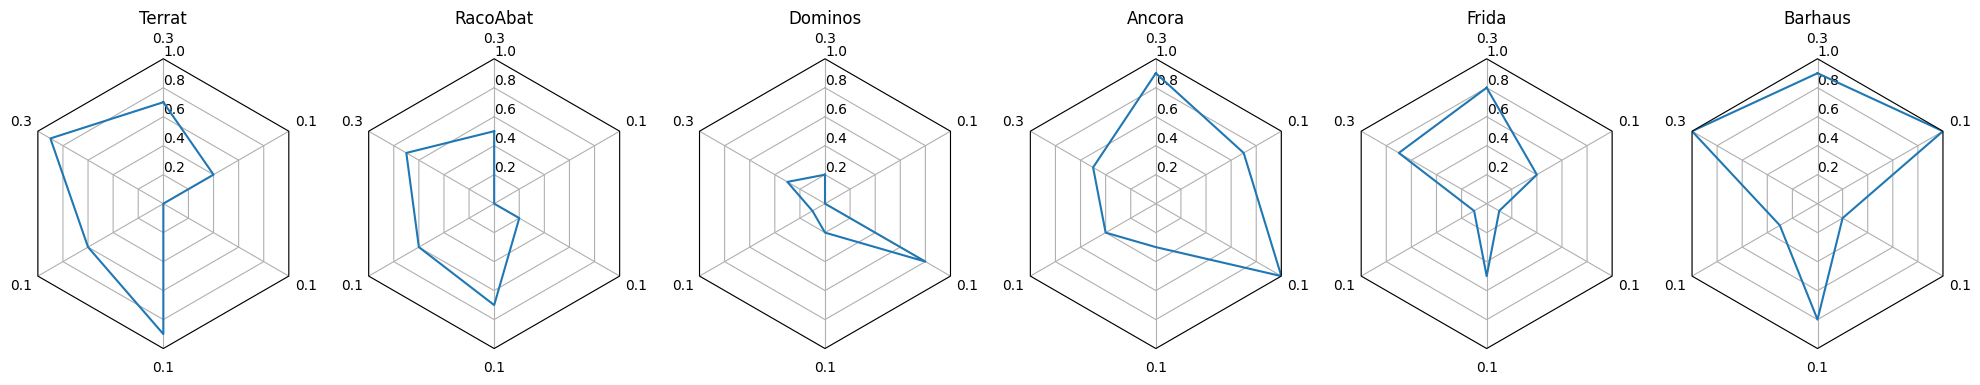

In [5]:
create_radar_projection(len(criteria), frame='polygon')

fig = Figure(ncols=6, figsize=(20, 20))

for alternative in alternatives:
    values = performance_table.get_alternative_values(alternative)
    ax = fig.create_add_axis(projection = radar_projection_name(len(criteria.values())))
    ax.title = alternative
    ax.add_plot(
        RadarPlot(
            criteria.values(),
            values.data,
            rlimits = [0,1]
        )
    )

fig.draw()

3. Now we want to apply the WSM aggregation. First, we will multiply the utilities and the corresponding weight.

In [6]:
weighted_table = performance_table.apply_criteria_weights(criteria)

weighted_table.df

,Food,Personnel,Atmosphere,Category,Location,Terrace
Terrat,0.21,0.27,0.06,0.09,0.00,0.04
RacoAbat,0.15,0.21,0.06,0.07,0.02,0.00
Dominos,0.06,0.09,0.01,0.02,0.08,0.00
Ancora,0.27,0.15,0.04,0.03,0.10,0.07
Frida,0.24,0.21,0.01,0.05,0.01,0.04
Barhaus,0.27,0.30,0.03,0.08,0.02,0.10


4. Secondly, we sum up all the alternatives to obtain an overall score on each one.

In [7]:
utilitiesWM = weighted_table.sum(axis=1)
utilitiesWM

Terrat      0.67
RacoAbat    0.51
Dominos     0.26
Ancora      0.66
Frida       0.56
Barhaus     0.80
dtype: float64

5. Once we have obtained the weighed table, let's plot it to see visually which alternative is the best according to the specified criteria weights.

/Users/Kacpe/Desktop/College Work/Repos/Semester 2/PMCDSS/PMCDSS/venv/lib/python3.12/site-packages/mcda/plot/plot.py:252: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig.show()
/Users/Kacpe/Desktop/College Work/Repos/Semester 2/PMCDSS/PMCDSS/venv/lib/python3.12/site-packages/mcda/plot/plot.py:252: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig.show()


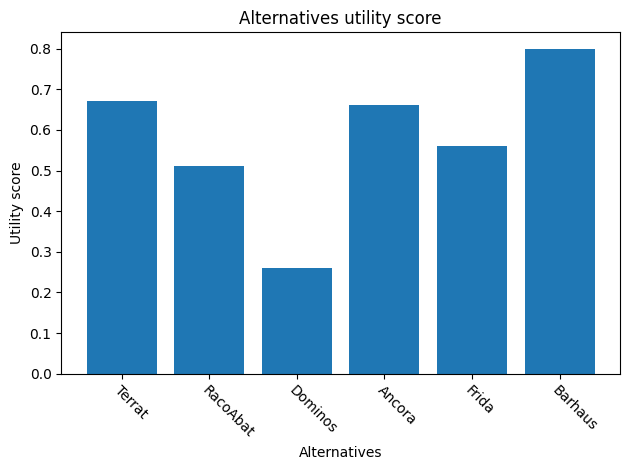

In [9]:
x = [*range(len(alternatives))]

plot = BarPlot(
    x, utilitiesWM, xticks=x,
    xticklabels = alternatives, xticklabels_tilted = True
)
plot.draw()
plot.axis.title = "Alternatives utility score"
plot.axis.xlabel = "Alternatives"
plot.axis.ylabel = "Utility score"
plot.axis.figure.draw()

*According to this plot, which alternative do you think is the best? Why?*


Answer: According to the plot, Barhaus is the best alternative, achieving a score of 0.8. The next best option is Terrat, with a score of 0.67, closely followed by Ancora at 0.66. Frida ranks next with 0.56. The second-lowest alternative is RacoAbat, scoring 0.51, while Dominos ranks the lowest with 0.26. These scores reflect the subjective requirements set at the beginning of the task, meaning the ranking depends on the predefined evaluation criteria.

*Notice that in this representation you can discard visually which are the worst alternatives.*

## Task 2: **Add new alternatives**

6. Modify the dataset including two new alternatives with the following characteristics:
- A restaurant that has the worst evaluations in all the criteria except in Personnel (as per correction posted on Moodle).
- A restaurant that has the worst evaluations in all the criteria except in Location.

Apply again the WSM and study the results achieved for these new restaurants in comparison with the rest of restaurants. Take into account that you must modify also the *alternatives* array.

In [12]:
# Alternatives names
new_alternatives = ["New_Alternative1", "New_Alternative2"]
# Alternatives scores for each criterion
alternatives_values = {
    "Food": [0.0, 0.0],
    "Personnel": [1.0, 0.0],
    "Atmosphere": [0.0, 0.0],
    "Category": [0.0, 0.0],
    "Location": [0.0, 1.0],
    "Terrace": [0.0, 0.0]
}

Now, modify the performance table by adding the utilities as indicated. You can also represent them in radar (spider) graphics if you want.

In [11]:
all_alternatives = alternatives + new_alternatives

performance_table.df = pd.concat([
    performance_table.df,
    pd.DataFrame(alternatives_values, index = new_alternatives)],
    axis = 0)
performance_table.df

,Food,Personnel,Atmosphere,Category,Location,Terrace
Terrat,0.7,0.9,0.6,0.9,0.0,0.4
RacoAbat,0.5,0.7,0.6,0.7,0.2,0.0
Dominos,0.2,0.3,0.1,0.2,0.8,0.0
Ancora,0.9,0.5,0.4,0.3,1.0,0.7
Frida,0.8,0.7,0.1,0.5,0.1,0.4
Barhaus,0.9,1.0,0.3,0.8,0.2,1.0
New_Alternative1,0.0,1.0,0.0,0.0,0.0,0.0
New_Alternative2,0.0,0.0,0.0,0.0,1.0,0.0


/Users/Kacpe/Desktop/College Work/Repos/Semester 2/PMCDSS/PMCDSS/venv/lib/python3.12/site-packages/mcda/plot/plot.py:252: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig.show()


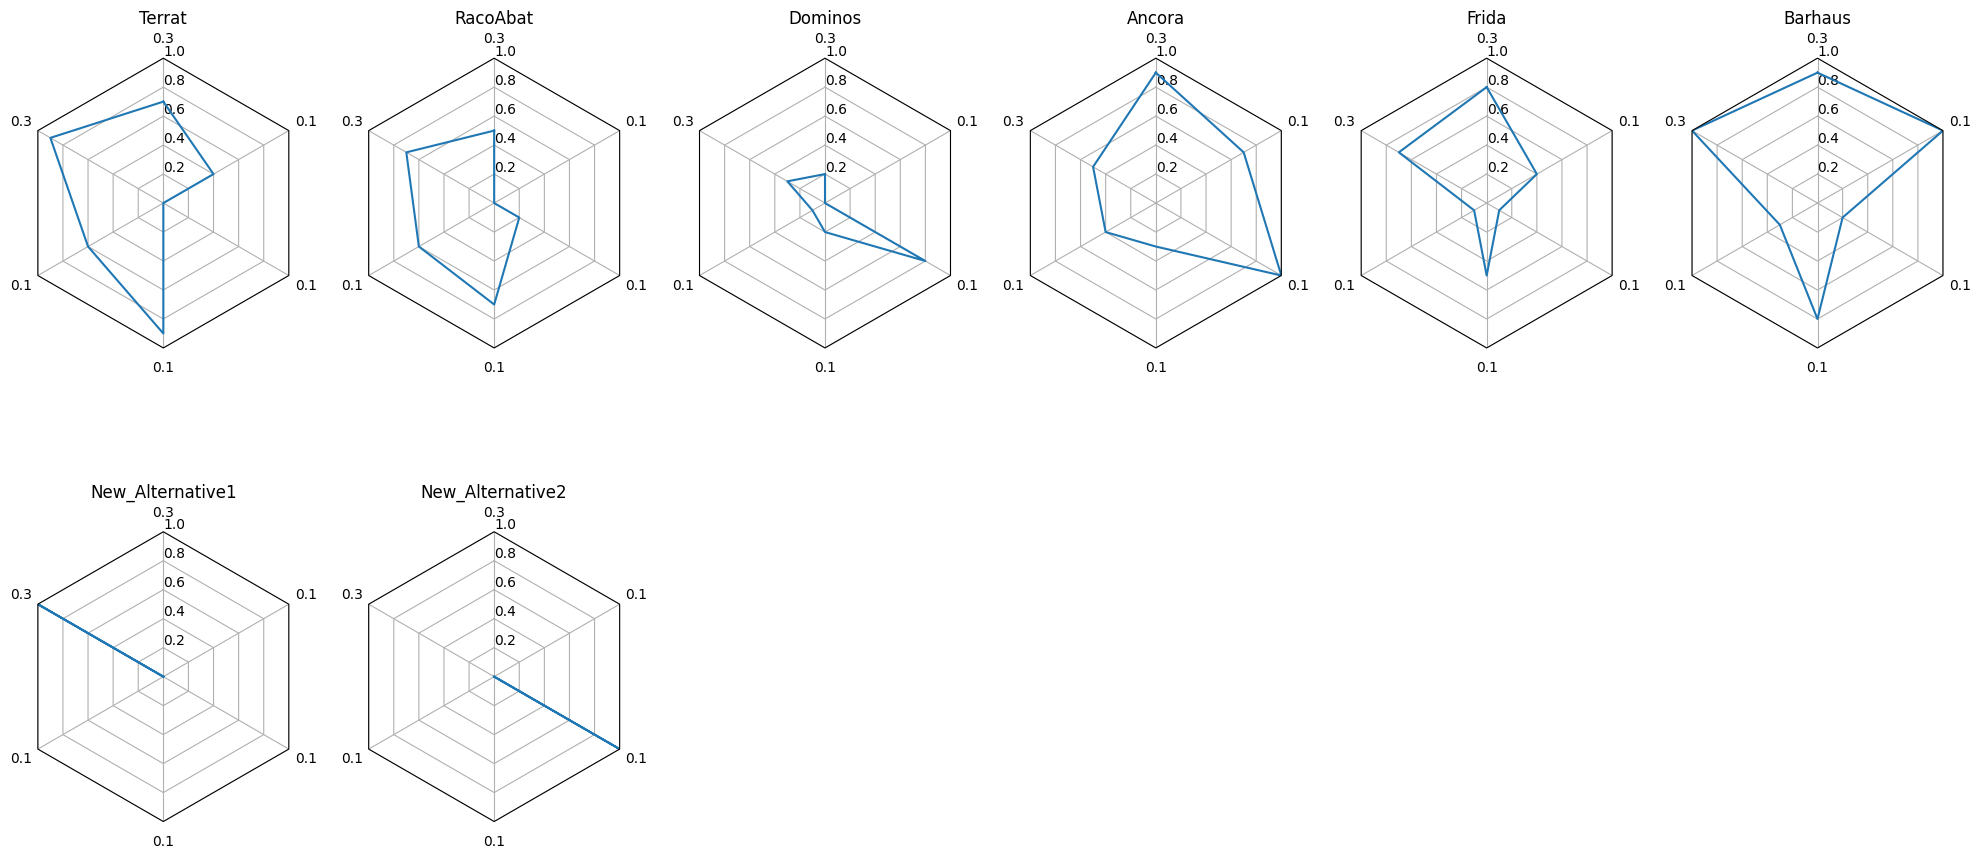

In [18]:
# New radar projection including the two new alternatives

create_radar_projection(len(criteria), frame='polygon')

fig = Figure(ncols=6, figsize=(20, 10))

for alternative in all_alternatives:
    values = performance_table.get_alternative_values(alternative)
    ax = fig.create_add_axis(projection = radar_projection_name(len(criteria.values())))
    ax.title = alternative
    ax.add_plot(
        RadarPlot(
            criteria.values(),
            values.data,
            rlimits = [0,1]
        )
    )

fig.draw()

Repeat the steps of the first part of the exercise to calculate the Weigthed Average and plot the results.

In [19]:
weighted_table = performance_table.apply_criteria_weights(criteria)

weighted_table.df

,Food,Personnel,Atmosphere,Category,Location,Terrace
Terrat,0.21,0.27,0.06,0.09,0.00,0.04
RacoAbat,0.15,0.21,0.06,0.07,0.02,0.00
Dominos,0.06,0.09,0.01,0.02,0.08,0.00
Ancora,0.27,0.15,0.04,0.03,0.10,0.07
Frida,0.24,0.21,0.01,0.05,0.01,0.04
Barhaus,0.27,0.30,0.03,0.08,0.02,0.10
New_Alternative1,0.00,0.30,0.00,0.00,0.00,0.00
New_Alternative2,0.00,0.00,0.00,0.00,0.10,0.00


In [20]:
utilitiesWM = weighted_table.sum(axis=1)
utilitiesWM

Terrat              0.67
RacoAbat            0.51
Dominos             0.26
Ancora              0.66
Frida               0.56
Barhaus             0.80
New_Alternative1    0.30
New_Alternative2    0.10
dtype: float64

/Users/Kacpe/Desktop/College Work/Repos/Semester 2/PMCDSS/PMCDSS/venv/lib/python3.12/site-packages/mcda/plot/plot.py:252: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig.show()
/Users/Kacpe/Desktop/College Work/Repos/Semester 2/PMCDSS/PMCDSS/venv/lib/python3.12/site-packages/mcda/plot/plot.py:252: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig.show()


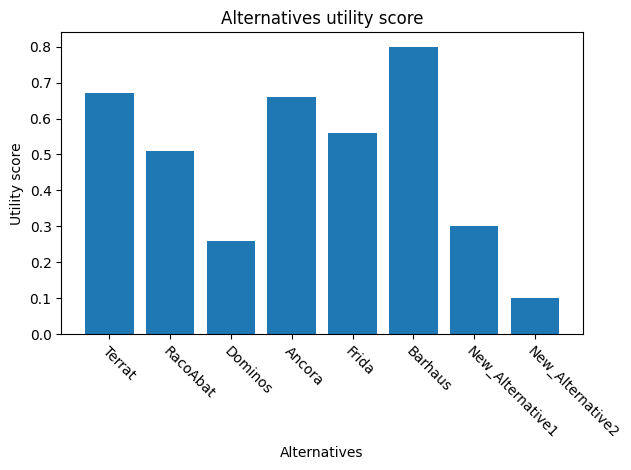

In [23]:
x = [*range(len(all_alternatives))]

plot = BarPlot(
    x, utilitiesWM, xticks=x,
    xticklabels = all_alternatives, xticklabels_tilted = True
)
plot.draw()
plot.axis.title = "Alternatives utility score"
plot.axis.xlabel = "Alternatives"
plot.axis.ylabel = "Utility score"
plot.axis.figure.draw()

Explanation: New_Alternative1 has a very high score in Personnel but minimal scores elsewhere. Because Personnel has a weight of 0.3, it lifts its overall utility somewhat, but not enough to surpass the majority of the restaurants. New_Alternative2 has a very high score in Location but minimal scores elsewhere. Given that the Location is weighted 0.1, its overall utility remains low. Comparing the new alternatives to the original ones reveals that Barhaus still remains the top choice. Dominos is no longer the lowest scoring alternative, with New_Alternative2 achieving a worse score.

## Task 3: **arithmetic non-weighted average**

In this part, you will execute a non-weighted **Arithmetic average**. Thus, it is necessary to modify the criteria weights by establishing the same weights for all criteria.

In [ ]:
# Define equal weights for the 6 criteria
equal_weights = {criterion: 1/6 for criterion in criteria}

# This results in 0.16 recurring for all criteria (as close to equal as possible)
print(equal_weights)


{'Food': 0.16666666666666666, 'Personnel': 0.16666666666666666, 'Atmosphere': 0.16666666666666666, 'Category': 0.16666666666666666, 'Location': 0.16666666666666666, 'Terrace': 0.16666666666666666}


In [ ]:
# New weights are applied to the performance table
weighted_table_eq = performance_table.apply_criteria_weights(equal_weights)

print(weighted_table_eq.df)

                      Food  Personnel  Atmosphere  Category  Location  \
Terrat            0.116667   0.150000    0.100000  0.150000  0.000000   
RacoAbat          0.083333   0.116667    0.100000  0.116667  0.033333   
Dominos           0.033333   0.050000    0.016667  0.033333  0.133333   
Ancora            0.150000   0.083333    0.066667  0.050000  0.166667   
Frida             0.133333   0.116667    0.016667  0.083333  0.016667   
Barhaus           0.150000   0.166667    0.050000  0.133333  0.033333   
New_Alternative1  0.000000   0.166667    0.000000  0.000000  0.000000   
New_Alternative2  0.000000   0.000000    0.000000  0.000000  0.166667   

                   Terrace  
Terrat            0.066667  
RacoAbat          0.000000  
Dominos           0.000000  
Ancora            0.116667  
Frida             0.066667  
Barhaus           0.166667  
New_Alternative1  0.000000  
New_Alternative2  0.000000  


In [ ]:
# The overall utility scores are calculated for each alternative
utilities_eq = weighted_table_eq.sum(axis=1)

utilities_eq

Terrat              0.583333
RacoAbat            0.450000
Dominos             0.266667
Ancora              0.633333
Frida               0.433333
Barhaus             0.700000
New_Alternative1    0.166667
New_Alternative2    0.166667
dtype: float64

Now, follow the same steps as in part one to calculate the Weigthed Average and plot the results.

/Users/Kacpe/Desktop/College Work/Repos/Semester 2/PMCDSS/PMCDSS/venv/lib/python3.12/site-packages/mcda/plot/plot.py:252: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig.show()
/Users/Kacpe/Desktop/College Work/Repos/Semester 2/PMCDSS/PMCDSS/venv/lib/python3.12/site-packages/mcda/plot/plot.py:252: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig.show()


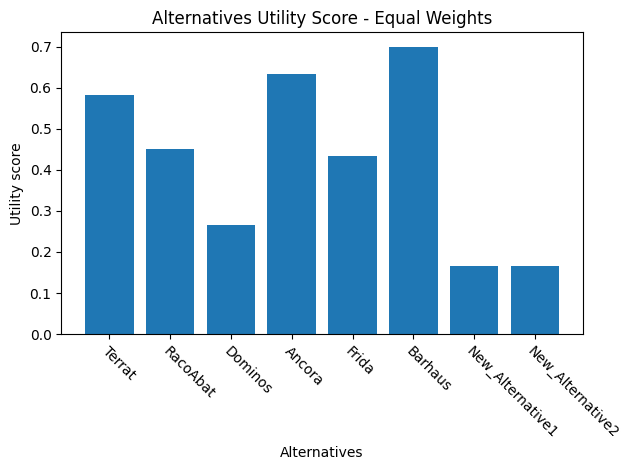

In [31]:
x = list(range(len(all_alternatives)))
plot = BarPlot(
    x, utilities_eq, xticks=x,
    xticklabels=all_alternatives, xticklabels_tilted=True
)
plot.draw()
plot.axis.title = "Alternatives Utility Score - Equal Weights"
plot.axis.xlabel = "Alternatives"
plot.axis.ylabel = "Utility score"
plot.axis.figure.draw()

### Comparing these results to Results from Task 2
With equal weights, each of the criterion has the same importance (1/6). Despite achieving a lower score than previously, Barhaus remains the top scoring alternative with a score of 0.7. Ancora drops marginally from 0.66 to 0.63 recurring, but is now the second best alternative, overtaking Terrat in the process. Terrat drops from second to third overall, also losing score from 0.67 to 0.583. RacoAbat is next with a score of 0.45 which is also a reduction from 0.51. 0.433 recurring for Frida is also a significant reduction from 0.56. Tied for the worst performing alternative are the two new alternatives added in Task 2, both with a score of 0.166667.

Its apparent in our case applying equal weighting has reduced the overall performance for the alternatives.

## Task 4: **OWA operator**

Now we will study the Ordered Weighted Average, with the same case study.
First we must import the functions about OWA from the package.

In [32]:
from mcda.mavt.aggregators import *
from mcda.core.scales import *


7. Rember that OWA does not give weights to criteria, so we assume all criteria have the same importance. We have now to define a set of weights that establish the aggregation policy (from a conjunctive to a disjunctive model).
The weights will be applied to the values after reordering them decreasingly.

You have here a set of weights to use as a first example. Can you say which is the aggregation policy?

In [33]:
weightsOWA =  [0.1, 0.3, 0.6, 0.0, 0.0, 0.0]
weightsOWA

[0.1, 0.3, 0.6, 0.0, 0.0, 0.0]

These weights represent a disjunctive aggregation policy, albeit only moderately disjunctive. Using the orness degree formula with these weights and positions, we achieve a score of 0.7. An arithmetic mean is achieved at 0.5, and any score above 0.5 is considered disjunctive. We say this policy is only moderately disjunctive because a score of 0.7 (out of 1) is near the centre. This can also be seen within the weights array as higher emphasis is placed on the weights near the middle.

In [36]:
owa = OWA(weightsOWA)
utilitiesOWA = owa(performance_table)
utilitiesOWA

Terrat              0.78
RacoAbat            0.64
Dominos             0.29
Ancora              0.79
Frida               0.59
Barhaus             0.94
New_Alternative1    0.10
New_Alternative2    0.10
dtype: float64

8. You should  also represent the scores obtained with the bar plot to facilitate the visualization.

/Users/Kacpe/Desktop/College Work/Repos/Semester 2/PMCDSS/PMCDSS/venv/lib/python3.12/site-packages/mcda/plot/plot.py:252: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig.show()
/Users/Kacpe/Desktop/College Work/Repos/Semester 2/PMCDSS/PMCDSS/venv/lib/python3.12/site-packages/mcda/plot/plot.py:252: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig.show()


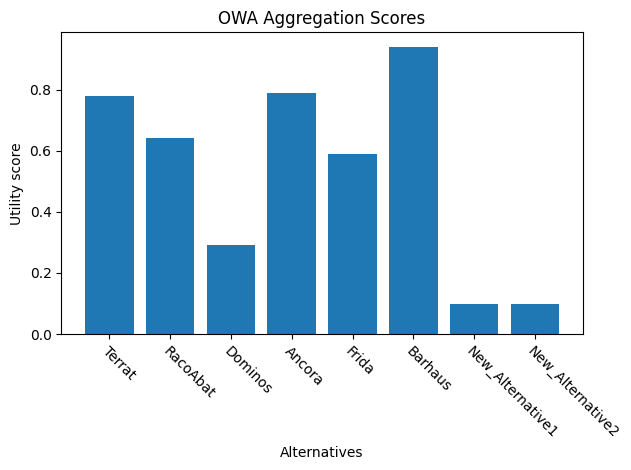

In [37]:
x = list(range(len(all_alternatives)))
plot = BarPlot(
    x, utilitiesOWA, xticks=x,
    xticklabels=all_alternatives, xticklabels_tilted=True
)
plot.draw()
plot.axis.title = "OWA Aggregation Scores"
plot.axis.xlabel = "Alternatives"
plot.axis.ylabel = "Utility score"
plot.axis.figure.draw()

9. Now, we will compare different sets of OWA weights. First you must define a disjunctive policy (with a weight=0 for the 2 worst values). Apply it to the restaurants.

10. Second, you must establish a conjunctive policy (simultaneity is required, most of the criteria must be fulfilled). Apply it to the restaurants.

11. Compare the results of both aggregation policies. Compare also them with respect to the arithmetic average.

Disjunctive OWA utilities:
 Terrat              0.775
RacoAbat            0.625
Dominos             0.375
Ancora              0.775
Frida               0.600
Barhaus             0.925
New_Alternative1    0.250
New_Alternative2    0.250
dtype: float64


/Users/Kacpe/Desktop/College Work/Repos/Semester 2/PMCDSS/PMCDSS/venv/lib/python3.12/site-packages/mcda/plot/plot.py:252: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig.show()
/Users/Kacpe/Desktop/College Work/Repos/Semester 2/PMCDSS/PMCDSS/venv/lib/python3.12/site-packages/mcda/plot/plot.py:252: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig.show()


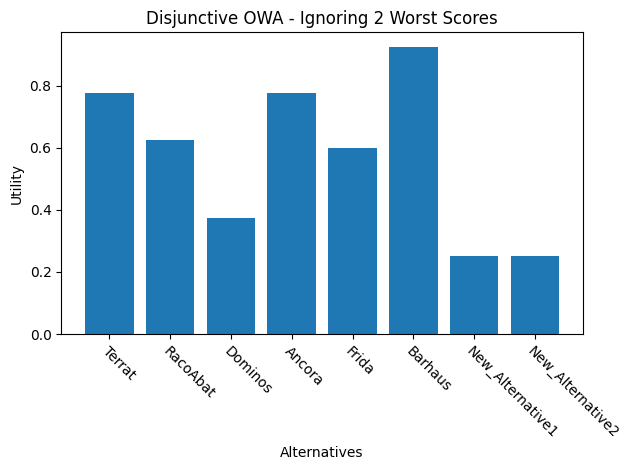

In [42]:
# TASK 9

weights_disjunctive = [0.25, 0.25, 0.25, 0.25, 0, 0]

owa_disj = OWA(weights_disjunctive)
utilities_disjunctive = owa_disj(performance_table)

print("Disjunctive OWA utilities:\n", utilities_disjunctive)

x = range(len(all_alternatives))
plot = BarPlot(
    x, utilities_disjunctive,
    xticks=x,
    xticklabels=all_alternatives,
    xticklabels_tilted=True
)
plot.draw()
plot.axis.title = "Disjunctive OWA - Ignoring 2 Worst Scores"
plot.axis.xlabel = "Alternatives"
plot.axis.ylabel = "Utility"
plot.axis.figure.draw()

Conjunctive OWA utilities:
 Terrat              0.24
RacoAbat            0.16
Dominos             0.07
Ancora              0.37
Frida               0.16
Barhaus             0.35
New_Alternative1    0.00
New_Alternative2    0.00
dtype: float64


/Users/Kacpe/Desktop/College Work/Repos/Semester 2/PMCDSS/PMCDSS/venv/lib/python3.12/site-packages/mcda/plot/plot.py:252: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig.show()
/Users/Kacpe/Desktop/College Work/Repos/Semester 2/PMCDSS/PMCDSS/venv/lib/python3.12/site-packages/mcda/plot/plot.py:252: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig.show()


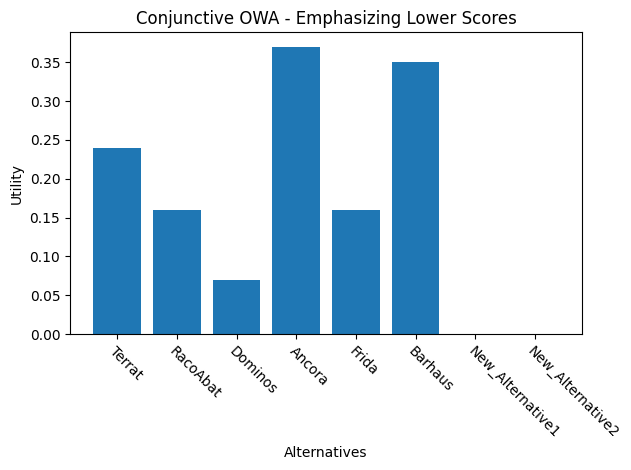

In [43]:
# TASK 10

# Conjunctive policy: heavier weight on the lower values
weights_conjunctive = [0, 0, 0, 0.2, 0.3, 0.5]

owa_conj = OWA(weights_conjunctive)
utilities_conjunctive = owa_conj(performance_table)

print("Conjunctive OWA utilities:\n", utilities_conjunctive)

x = range(len(all_alternatives))
plot = BarPlot(
    x, utilities_conjunctive,
    xticks=x,
    xticklabels=all_alternatives,
    xticklabels_tilted=True
)
plot.draw()
plot.axis.title = "Conjunctive OWA - Emphasizing Lower Scores"
plot.axis.xlabel = "Alternatives"
plot.axis.ylabel = "Utility"
plot.axis.figure.draw()


Arithmetic average utilities:
 Terrat              0.583333
RacoAbat            0.450000
Dominos             0.266667
Ancora              0.633333
Frida               0.433333
Barhaus             0.700000
New_Alternative1    0.166667
New_Alternative2    0.166667
dtype: float64


/Users/Kacpe/Desktop/College Work/Repos/Semester 2/PMCDSS/PMCDSS/venv/lib/python3.12/site-packages/mcda/plot/plot.py:252: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig.show()
/Users/Kacpe/Desktop/College Work/Repos/Semester 2/PMCDSS/PMCDSS/venv/lib/python3.12/site-packages/mcda/plot/plot.py:252: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig.show()


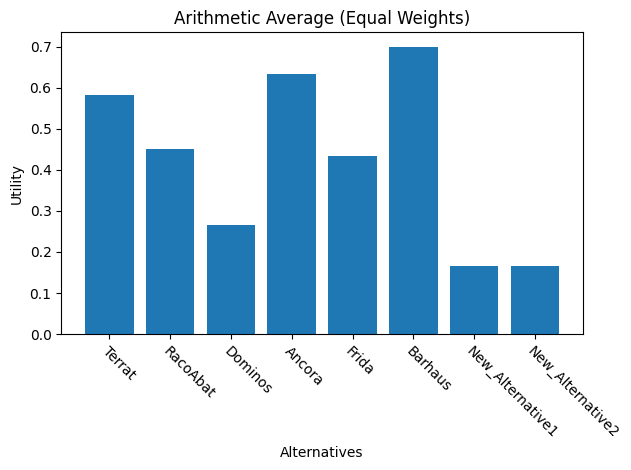

In [ ]:
# TASK 11

num_criteria = len(criteria)
equal_weights = {crit: 1/num_criteria for crit in criteria}

weighted_table_eq = performance_table.apply_criteria_weights(equal_weights)
utilities_eq = weighted_table_eq.sum(axis=1)

print("Arithmetic mean utilities:\n", utilities_eq)

x = range(len(all_alternatives))
plot = BarPlot(
    x, utilities_eq,
    xticks=x,
    xticklabels=all_alternatives,
    xticklabels_tilted=True
)
plot.draw()
plot.axis.title = "Arithmetic Mean"
plot.axis.xlabel = "Alternatives"
plot.axis.ylabel = "Utility"
plot.axis.figure.draw()

### Comparing Results of Task 9, Task 10, and the Arithmetic Mean

By applying a disjunctive policy as seen in task 9, the performance scores of each of the alternatives are greater higher than when a conjunctive policy is applied as seen in task 10. This is expected as by definition, a disjunctive policy allows for compensation in poor performing criterion. Whereas with a conjunctive policy, all criterion must satisfy the requirements to some degree to achieve a high score - it is apparent no alternative did so as the highest score achieved is 0.37 by Ancora.

The arithmetic mean on the other hand is the harmonic balance between conjunctivity and disjunctivity - it allows for some compensation in poor scoring.

## Task 5 **Aggregation policies: descriptors of the OWA weights**

There are different measures to characterise the vector of weights, such as: Balance, Divergence, Entropy and Orness.

In this task, we will practise with the examples of sets of weights given in the following table:

| Weights | Balance | Divergence | Entropy| Orness |
| --- | --- | --- | --- | --- |
| 0.0, 0.3, 0.4, 0.3, 0.0, 0.0 | 0.2 | 0.024 | 1.089 | 0.6 |
| 0.0, 0.0, 0.0, 0.2, 0.3, 0.5 | -0.72 | 0.024 | 1.030 | 0.14 |
| 1.0, 0.0, 0.0, 0.0, 0.0, 0.0 | 1.0 | 0.0 | -0.0 | 1.0 |
| 0.1, 0.1, 0.3, 0.3, 0.1, 0.1 | 0.0 | 0.074 | 1.643 | 0.5 |
| 0.1, 0.3, 0.6, 0.0, 0.0, 0.0 | 0.4 | 0.018 | 0.898 | 0.7 |

12. The MCDA package only includes the orness and dispersion measures, for the moment. So, below you have the functions that implement the characterisation measures of OWA weights. The input of these functions is a vector of weights. So they must be executed for each row of the table.

In [48]:
# Weights acquired from table above
examples_OWA_weights = [[0.0, 0.3, 0.4, 0.3, 0.0, 0.0],
                        [0.0, 0.0, 0.0, 0.2, 0.3, 0.5],
                        [1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                        [0.1, 0.1, 0.3, 0.3, 0.1, 0.1],
                        [0.1, 0.3, 0.6, 0.0, 0.0, 0.0]]

for weights in examples_OWA_weights:
    print(weights)
    example_OWA = OWA(weights)

    print(f"Balance: {example_OWA.balance}")
    print(f"Divergence: {example_OWA.divergence}")
    print(f"Entropy: {example_OWA.dispersion}")
    print(f"Orness: {example_OWA.orness}\n")


[0.0, 0.3, 0.4, 0.3, 0.0, 0.0]
Balance: 0.2
Divergence: 0.024
Entropy: 1.0888999753452238
Orness: 0.6

[0.0, 0.0, 0.0, 0.2, 0.3, 0.5]
Balance: -0.72
Divergence: 0.0244
Entropy: 1.0296530140645737
Orness: 0.13999999999999999

[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Balance: 1.0
Divergence: 0.0
Entropy: -0.0
Orness: 1.0

[0.1, 0.1, 0.3, 0.3, 0.1, 0.1]
Balance: 0.0
Divergence: 0.074
Entropy: 1.6434177197931799
Orness: 0.5

[0.1, 0.3, 0.6, 0.0, 0.0, 0.0]
Balance: 0.4
Divergence: 0.018000000000000002
Entropy: 0.8979457248567798
Orness: 0.7



### Explanation of Metric Scores
- **Balance** indicates the skew or symmetry of the weight distribution. A value near 0 suggests a more balanced set of weights, whereas a larger positive or negative value indicates skewness.
- **Divergence** shows how far the weights are from a uniform distribution. Higher values mean more uneven weighting.
- **Entropy** measures how spread out the weights are. Larger entropy means weights are more evenly distributed.
- **Orness** ranges from 0 (fully conjunctive/min-like) to 1 (fully disjunctive/max-like). A higher orness (close to 1) favors the best scores, whereas a lower orness (close to 0) favors the worst scores.

- **Weight Vector: 0.0, 0.3, 0.4, 0.3, 0.0, 0.0**  
  - *Balance (0.2):* The slight positive balance indicates a modest bias toward the better (higher-ranked) positions.  
  - *Orness (0.6):* With an orness of 0.6 (above the neutral 0.5), this vector favors the top scores but still considers middle values.  
  - *Entropy (1.089) & Divergence (0.024):* The spread is moderate and the weights deviate only slightly from a uniform distribution, confirming a balanced yet somewhat optimistic approach.

- **Weight Vector: 0.0, 0.0, 0.0, 0.2, 0.3, 0.5**  
  - *Balance (-0.72):* The strongly negative balance shows a heavy bias toward the lower positions, meaning poor scores have a large impact.  
  - *Orness (0.14):* This very low orness confirms a highly conjunctive policy, where the worst scores dominate the outcome.  
  - *Entropy (1.030) & Divergence (0.024):* Although the spread is similar to the first vector, the focus is shifted to the worst criteria, reinforcing the conjunctive nature.

- **Weight Vector: 1.0, 0.0, 0.0, 0.0, 0.0, 0.0**  
  - *Balance (1.0):* The entire weight is on the best criterion, showing maximum skewness toward the top.  
  - *Orness (1.0):* An orness of 1.0 reflects a pure disjunctive (max-like) operator—only the best performance counts.  
  - *Entropy (-0.0) & Divergence (0.0):* There is no spread since all weight is concentrated in one position.

- **Weight Vector: 0.1, 0.1, 0.3, 0.3, 0.1, 0.1**  
  - *Balance (0.0):* The zero balance indicates a perfectly symmetric distribution around the middle.  
  - *Orness (0.5):* An orness of 0.5 shows that this aggregation is neutral—neither favoring the best nor the worst scores.  
  - *Entropy (1.643) & Divergence (0.074):* The high entropy indicates a very even spread of weights, resulting in an aggregation similar to an arithmetic mean.

- **Weight Vector: 0.1, 0.3, 0.6, 0.0, 0.0, 0.0**  
  - *Balance (0.4):* A moderate positive balance shows that the weight distribution is skewed toward the top, emphasizing the better criteria.  
  - *Orness (0.7):* With an orness of 0.7, this vector is quite disjunctive.
  - *Entropy (0.898) & Divergence (0.018):* The lower entropy indicates a more concentrated weighting on the top positions, further confirming the strong emphasis on high performance.